In [ ]:
# Import libraries:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# Number of detectors:
det_num = 4

# RF period (325 MHz frequency):
T = 1/(325*10**6)*10**9 # ns

# Figure directory:
dir = "Figures/"

In [3]:
# Values for all detectors:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []
t_vals = []; position = []
kde_vals = []
for j in range(det_num):

    # Load data from output txt files:
    data = np.loadtxt('det-out-'+str(j)+'.txt')

    # Values for each detector:
    x = []; y = []; z = []
    px = []; py = []; pz = []
    t = []
    for i in range(data.shape[0]):
        x.append(data[i][0]/10) # mm -> cm
        y.append(data[i][1]/10)
        z.append(data[i][2]/10)
        px.append(data[i][3]) # MeV/c
        py.append(data[i][4])
        pz.append(data[i][5])
        t.append(data[i][6]) # ns
    
    # 2D Gaussian kernel density estimate:
    data = np.vstack([x,y])
    kde = gaussian_kde(data) # with positions in xy-plane
    kde_val = kde(data)
    kde_vals.append(kde_val)

    # Values for entire channel:
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)
    px_vals.append(px)
    py_vals.append(py)
    pz_vals.append(pz)
    t_vals.append(t)
    position.append(z[0]/100) # cm -> m

In [4]:
position

[np.float64(2.8501999999999996),
 np.float64(5.6502),
 np.float64(8.4502),
 np.float64(12.6502)]

In [5]:
max_kde_vals = []
for i in range(det_num):
    max_kde_vals.append(max(kde_vals[i]))
max_kde = max(max_kde_vals)
print(max_kde)

0.017732270363738166


In [6]:
# Find center of distribution at each detector:
x_centers = []
y_centers = []
for i in range(det_num):
    x_center = np.mean(x_vals[i])
    y_center = np.mean(y_vals[i])
    print(x_center, y_center)
    x_centers.append(x_center)
    y_centers.append(y_center)

-0.319155854 -0.018544394800000003
0.4736350575757576 0.8646905757575757
-0.9324935651685393 1.3867364707865169
-1.25612115625 0.38025059843750003


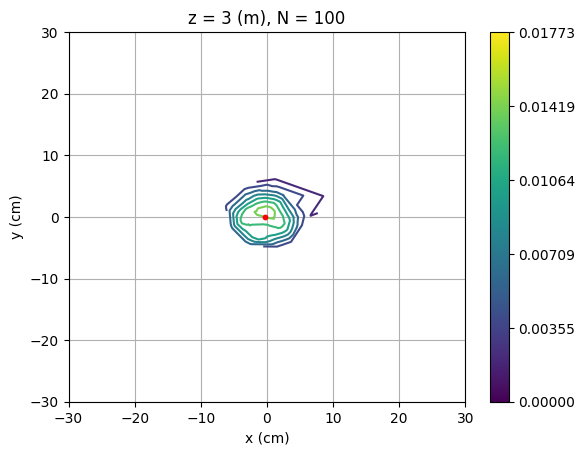

In [ ]:
# Animated contour plot:
fig = plt.figure()
def animate(frame):
    plt.clf()
    im = plt.tricontour(x_vals[frame],y_vals[frame],kde_vals[frame])
    norm = Normalize(vmin=0,vmax=max_kde)
    mapp = cm.ScalarMappable(norm=norm)
    cbar = plt.colorbar(mapp,ax=plt.gca())
    im.set_clim(0,max_kde)
    cbar.update_normal(im)
    cbar.set_ticks(np.linspace(0,max_kde,num=6))
    plt.xlim(-30,30)
    plt.ylim(-30,30)
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')
    plt.title('z = '+str(round(position[frame]))+' (m), N = '+str(len(x_vals[frame])))
    plt.grid()
    plt.scatter(x_centers[frame], y_centers[frame], color='red', label='Center',zorder=5,s=10)
animation = FuncAnimation(fig, animate, frames=det_num, interval=500, repeat=True)
animation.save(dir+'contour_animation_single_period.gif', writer='pillow')

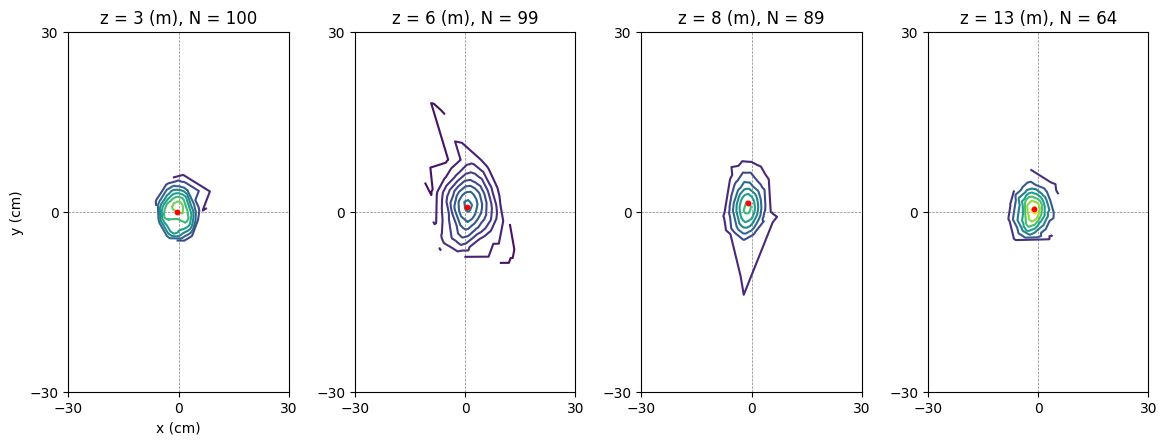

In [ ]:
# Subplot of contours:
fig, axes = plt.subplots(1,4,figsize=(12,4))
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)
axes = axes.flatten()
for i in range(det_num):
    ax = axes[i]
    im = ax.tricontour(x_vals[i],y_vals[i],kde_vals[i],cmap='viridis')
    im.set_clim(0,max_kde)
    ax.set_xlim(-30,30)
    ax.set_ylim(-30,30)
    ax.set_xticks(np.linspace(-30,30,num=3))
    ax.set_yticks(np.linspace(-30,30,num=3))
    ax.set_title('z = '+str(round(position[i]))+' (m), N = '+str(len(x_vals[i])))
    ax.grid(True,which='both',linestyle='--',color='gray',linewidth=0.5)
    ax.scatter(x_centers[i], y_centers[i], color='red', label='Center',zorder=5,s=10)
    if i == 0:
        ax.set_xlabel('x (cm)'); ax.set_ylabel('y (cm)')
plt.savefig(dir+'contour_subplot_single_period.png',dpi=300)

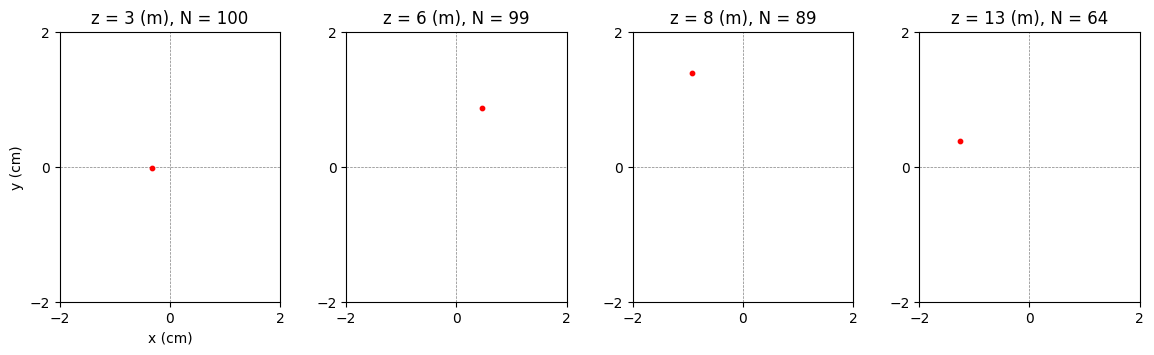

In [69]:
# Center of distribution along period:
fig, axes = plt.subplots(1,4,figsize=(12,3))
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)
axes = axes.flatten()
for i in range(det_num):
    ax = axes[i]
    ax.scatter(x_centers[i], y_centers[i], color='red', label='Center',zorder=5,s=10)
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_xticks(np.linspace(-2,2,num=3))
    ax.set_yticks(np.linspace(-2,2,num=3))
    ax.set_title('z = '+str(round(position[i]))+' (m), N = '+str(len(x_vals[i])))
    ax.grid(True,which='both',linestyle='--',color='gray',linewidth=0.5)
    if i == 0:
        ax.set_xlabel('x (cm)'); ax.set_ylabel('y (cm)')

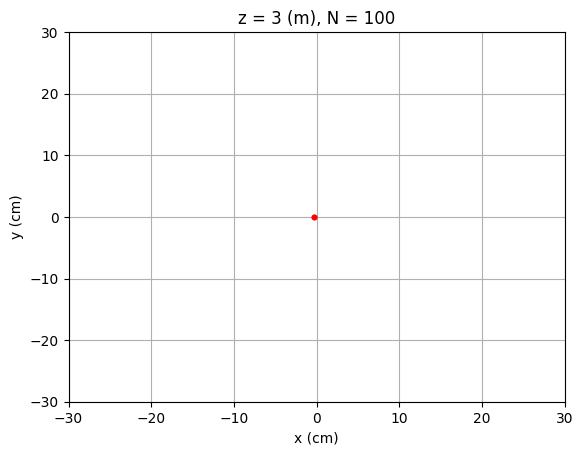

In [ ]:
# Animated plot of center of distribution:
fig = plt.figure()
def animate(frame):
    plt.clf()
    plt.scatter(x_centers[frame], y_centers[frame], color='red', label='Center',zorder=5,s=10)
    plt.xlim(-30,30)
    plt.ylim(-30,30)
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')
    plt.title('z = '+str(round(position[frame]))+' (m), N = '+str(len(x_vals[frame])))
    plt.grid()
    plt.scatter(x_centers[frame], y_centers[frame], color='red', label='Center',zorder=5,s=10)
animation = FuncAnimation(fig, animate, frames=det_num, interval=500, repeat=True)
animation.save(dir+'center_distribution_animation_single_period.gif', writer='pillow')

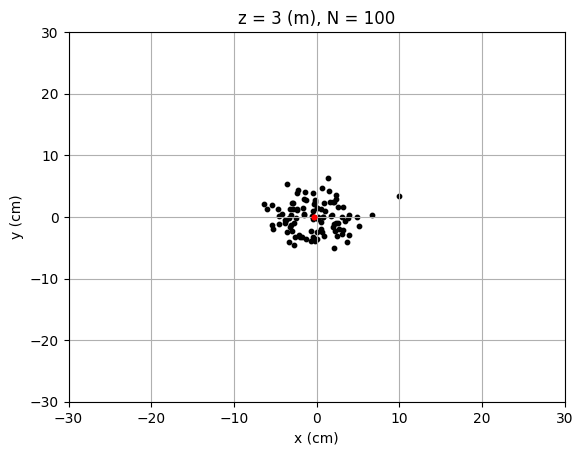

In [ ]:
# Animated plot of center of distribution:
fig = plt.figure()
def animate(frame):
    plt.clf()
    plt.scatter(x_vals[frame], y_vals[frame], color='black',s=10)
    plt.scatter(x_centers[frame], y_centers[frame], color='red', label='Center',zorder=5,s=10)
    plt.xlim(-30,30)
    plt.ylim(-30,30)
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')
    plt.title('z = '+str(round(position[frame]))+' (m), N = '+str(len(x_vals[frame])))
    plt.grid()
    plt.scatter(x_centers[frame], y_centers[frame], color='red', label='Center',zorder=5,s=10)
animation = FuncAnimation(fig, animate, frames=det_num, interval=500, repeat=True)
animation.save(dir+'scatter_animation_single_period.gif', writer='pillow')